In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [3]:
dir_path = r'Dataset'
os.listdir(dir_path)

['Meta', 'Meta.csv', 'test', 'Test.csv', 'train', 'Train.csv']

In [4]:
train_path = dir_path +'\Train'
test_path = dir_path + '\Test'
print(sorted(os.listdir(train_path)))
sorted(os.listdir(test_path))

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


['00000.png',
 '00001.png',
 '00002.png',
 '00003.png',
 '00004.png',
 '00005.png',
 '00006.png',
 '00007.png',
 '00008.png',
 '00009.png',
 '00010.png',
 '00011.png',
 '00012.png',
 '00013.png',
 '00014.png',
 '00015.png',
 '00016.png',
 '00017.png',
 '00018.png',
 '00019.png',
 '00020.png',
 '00021.png',
 '00022.png',
 '00023.png',
 '00024.png',
 '00025.png',
 '00026.png',
 '00027.png',
 '00028.png',
 '00029.png',
 '00030.png',
 '00031.png',
 '00032.png',
 '00033.png',
 '00034.png',
 '00035.png',
 '00036.png',
 '00037.png',
 '00038.png',
 '00039.png',
 '00040.png',
 '00041.png',
 '00042.png',
 '00043.png',
 '00044.png',
 '00045.png',
 '00046.png',
 '00047.png',
 '00048.png',
 '00049.png',
 '00050.png',
 '00051.png',
 '00052.png',
 '00053.png',
 '00054.png',
 '00055.png',
 '00056.png',
 '00057.png',
 '00058.png',
 '00059.png',
 '00060.png',
 '00061.png',
 '00062.png',
 '00063.png',
 '00064.png',
 '00065.png',
 '00066.png',
 '00067.png',
 '00068.png',
 '00069.png',
 '00070.png',
 '0007

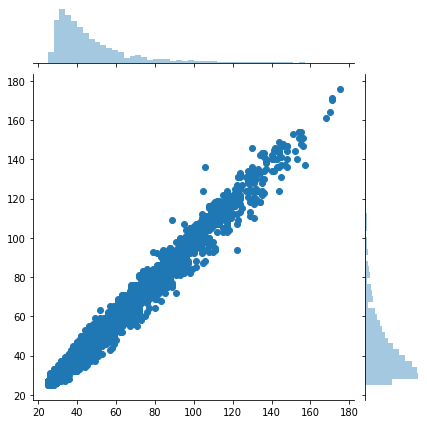

In [5]:
dim1 = []
dim2 = []

for i in range(0,10):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])
        
sns.jointplot(dim1,dim2)
plt.show()      

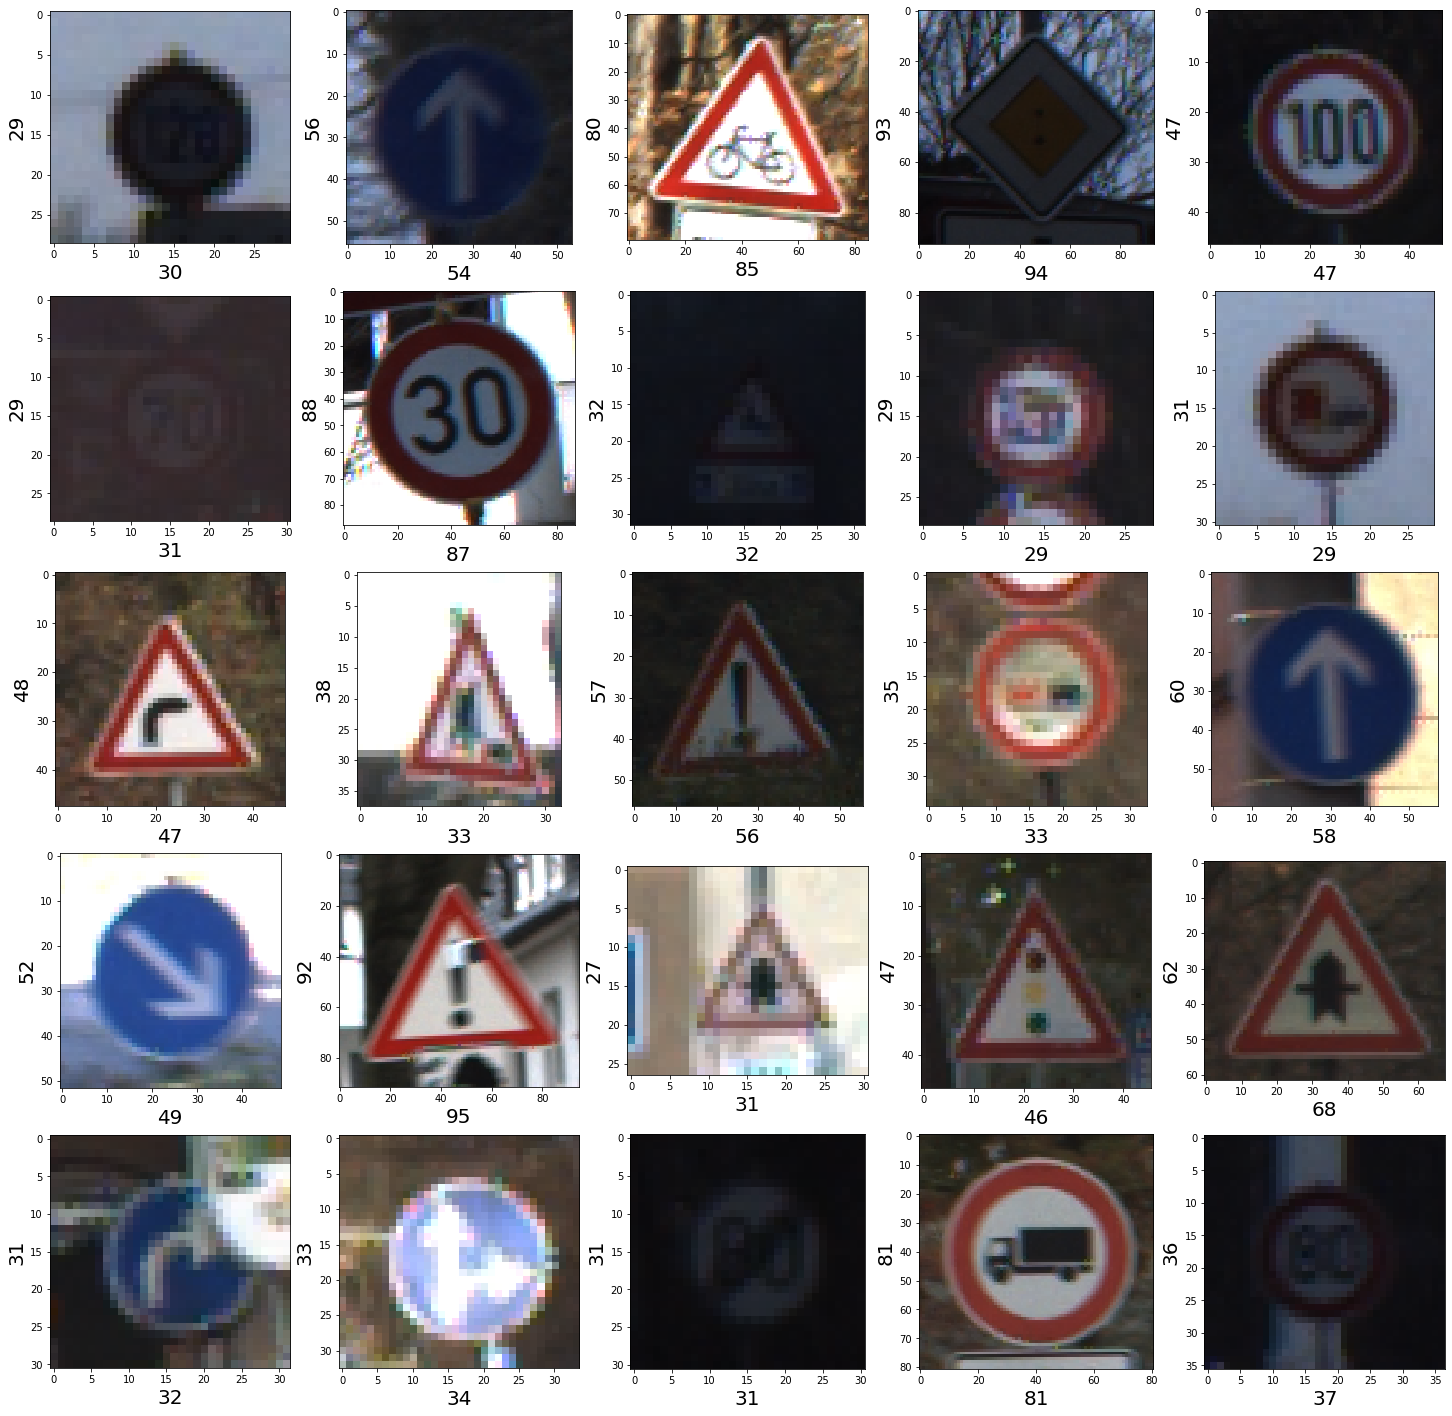

In [6]:
import random

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))

 
for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [12]:
np.mean(dim1)

np.mean(dim2)
image_shape = (50,50)

In [13]:
#Data Preprocessing
#Importing the images
from PIL import Image

images = []
label_id = []

for i in range(10):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [14]:
images = np.array(images)
images = images/255  

label_id = np.array(label_id)
label_id.shape
images.shape

(14670, 50, 50, 3)

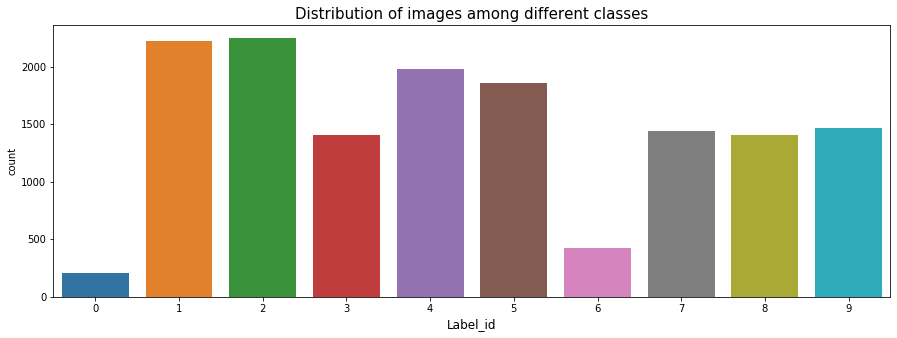

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

In [16]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

In [17]:
import numpy as np
import pandas as pd
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')
#Splitting the data
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [18]:
#keras has a built-in function for one-hot encoding.
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (4,4), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          6

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 10,
    batch_size = 32,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 1

)    
model.save(r'traffic_recognition.h5')

Train on 11736 samples, validate on 2934 samples
Epoch 1/10
11736/11736 [==============================] - 69s 6ms/sample - loss: 2.2430 - accuracy: 0.1818 - val_loss: 2.0559 - val_accuracy: 0.2420
Epoch 2/10
11736/11736 [==============================] - 67s 6ms/sample - loss: 1.6304 - accuracy: 0.3997 - val_loss: 0.8361 - val_accuracy: 0.7590
Epoch 3/10
11736/11736 [==============================] - 73s 6ms/sample - loss: 0.8035 - accuracy: 0.7106 - val_loss: 0.3587 - val_accuracy: 0.9151
Epoch 4/10
11736/11736 [==============================] - 64s 5ms/sample - loss: 0.4864 - accuracy: 0.8330 - val_loss: 0.1709 - val_accuracy: 0.9601
Epoch 5/10
11736/11736 [==============================] - 61s 5ms/sample - loss: 0.3426 - accuracy: 0.8860 - val_loss: 0.1224 - val_accuracy: 0.9721
Epoch 6/10
11736/11736 [==============================] - 57s 5ms/sample - loss: 0.2687 - accuracy: 0.9103 - val_loss: 0.0750 - val_accuracy: 0.9877
Epoch 7/10
11736/11736 [==============================] -

In [21]:
cnn=(model.evaluate(x_val,y_val,verbose=1)[1])*100
print('Convolutional Neural Network Accuracy is:',cnn,'%')

2934/2934 [==============================] - 3s 1ms/sample - loss: 0.0405 - accuracy: 0.9932
Convolutional Neural Network Accuracy is: 99.31833744049072 %


In [22]:
history=model.history.history
#Plotting the accuracy
train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['accuracy']
val_acc = history['val_accuracy']

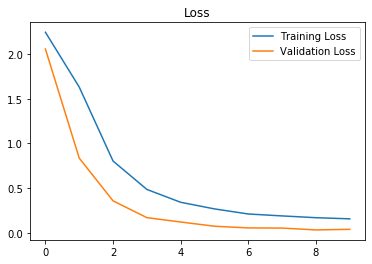

In [23]:
# Loss
plt.figure()
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()


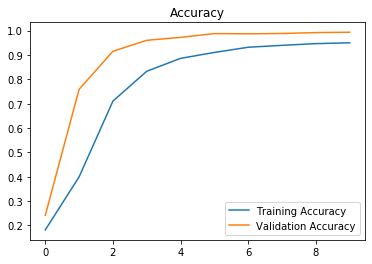

In [24]:
# Accuracy
plt.figure()
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: traffic_classifier.h5.\assets


In [77]:
import tkinter as tk
import tensorflow as tf
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
import keras
from keras.models import load_model
model = tf.keras.models.load_model(r"C:\Users\manogna\Desktop\source code\traffic_recognition.h5")

In [70]:

classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }


In [71]:
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

In [72]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize(((50,50)))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[1]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign)

In [73]:
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

In [74]:
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [75]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

In [76]:
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\manogna\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-73-c3d169264d01>", line 2, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-72-530a6e09123f>", line 7, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 338, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiproce

Speed limit (20km/h)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\manogna\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-73-c3d169264d01>", line 2, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-72-530a6e09123f>", line 7, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 338, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiproce

Speed limit (20km/h)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\manogna\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-73-c3d169264d01>", line 2, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-72-530a6e09123f>", line 7, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py", line 338, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 1013, in predict
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\manogna\anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 498, in predict
    workers=workers, use_multiprocessing=use_multiproce